<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/main/Version%20de%20lau%20para%20sumar%20graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [83]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')
pd.options.display.float_format = '{:,.0f}'.format

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [84]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

Empezamos viendo las medidas descriptivas de nuestras variables de interés

In [85]:
#medidas descriptivas del salario bruto y el neto
df[['salary_monthly_BRUTO','salary_monthly_NETO']].describe().round()



,salary_monthly_BRUTO,salary_monthly_NETO
count,"6,095","5,883"
mean,"124,059","94,908"
std,"122,912","96,862"
min,1,1
25%,"61,595","51,480"
50%,"96,000","78,000"
75%,"145,000","106,000"
max,"2,180,000","2,080,000"


EXPLICAR PORQUE ELEGIMOS EL SALARIO BRUTO (COUNT) 

Se observa que tanto el Salario Bruto como el Neto tienen como valor mínimo "$1" (asumimos equivalentes a un "ns/nc"), y máximos muy alejados de la media (podrían ser excepcionales y dificultarnos la comprensión de los datos). Veamos un histograma de las dos medidas para entender sus distribuciones.

AQUI LOS HISTOGRAMAS

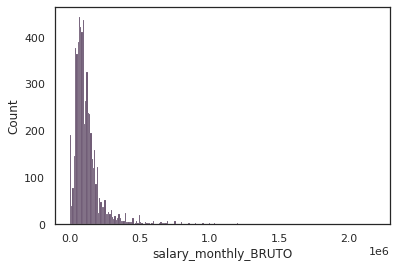

In [86]:
seaborn.set_theme(style="white", palette="rocket")
x = df['salary_monthly_BRUTO']
ax = seaborn.histplot(x) #

En el gráfico observamos una fuerte presencia de valores outliers que consideramos apropiado remover para un mejor análisis de los resultados.
El siguiente código remueve las filas de datos para las cuales la diferencia entre el salario NETO/BRUTO (ver cuál decidimos usar) y la media es menor o igual que 2.5 veces el desvío estándar del salario. Nótese que remueve tanto los valores muy altos y como los muy bajos. El criterio es que estan por fuera del ##% de los datos.

In [87]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2 * interesting_col.std()))
    return dataset[mask_outlier]

In [88]:
df_filtered = clean_outliers_sd(df,'salary_monthly_BRUTO')

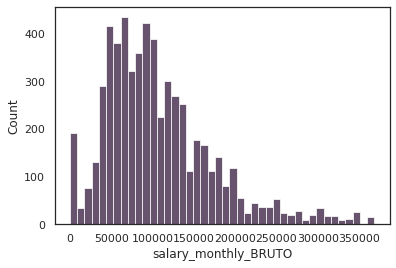

In [89]:
seaborn.set_theme(style="white", palette="rocket")
d = df_filtered['salary_monthly_BRUTO']
ad = seaborn.histplot(d) #

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [90]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [91]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno','')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df_filtered.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

#df_filtered[:5]



,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3,3,3,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5,2,2,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2,0,0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15,15,13,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9,6,6,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [93]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2403
1,sql,2089
2,html,1793
3,java,1407
4,python,1403
5,css,1201
6,bash/shell,946
7,php,859
8,.net,799
9,typescript,731


In [94]:
seaborn.set_theme(style="white")

Text(0.5, 1.0, 'Lenguajes de programación o tecnologías que manejan')

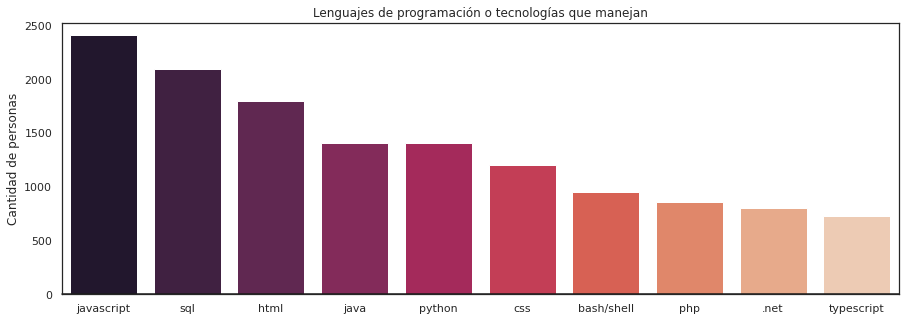

In [95]:
aux = language_count[:10]
filtered_language_count = aux.sort_values(by='frequency',ascending=False,inplace=False)


x = numpy.array(list(filtered_language_count['language']))
y1 = numpy.array(list(filtered_language_count['frequency']))
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Cantidad de personas")
ax1.set_title("Lenguajes de programación o tecnologías que manejan")

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [96]:
interesting_languages =  filtered_language_count['language']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
#filtered_df_lang[:5]



In [97]:
df_filtered[['salary_monthly_BRUTO']].describe().round()

,salary_monthly_BRUTO
count,"5,885"
mean,"107,156"
std,"66,352"
min,1
25%,"60,000"
50%,"94,000"
75%,"140,000"
max,"368,300"


In [98]:
pd.options.display.float_format = '{:,.0f}'.format
filtered_df_lang.groupby('programming_language').describe().round()

salary_monthly_BRUTO                                    \
                                    count    mean    std min    25%     50%   
programming_language                                                          
.net                                  799 104,371 62,432   1 61,520  92,000   
bash/shell                            946 121,499 68,342   2 72,000 110,000   
css                                 1,201 100,582 63,461   1 57,330  88,000   
html                                1,793 100,826 64,252   1 58,000  88,500   
java                                1,407 120,743 69,352   1 69,000 110,000   
javascript                          2,403 109,608 69,144   1 60,241  96,000   
php                                   859 103,124 67,437   1 55,500  89,630   
python                              1,403 123,904 71,424   1 73,000 110,000   
sql                                 2,089 104,934 63,313   1 60,000  92,000   
typescript                            731 117,283 69,144   1 67,570 104,000   

                                      
                         75%     max  
programming_language                  
.net                 134,500 360,000  
bash/shell           152,150 368,300  
css                  130,000 360,000  
html                 129,000 364,000  
java                 160,000 360,000  
javascript           140,000 365,000  
php                  133,500 365,000  
python               160,000 368,300  
sql                  135,000 365,000  
typescript           150,000 360,000

In [99]:
filtered_df_lang.groupby('programming_language').median().round()

,salary_monthly_BRUTO
programming_language,
.net,"92,000"
bash/shell,"110,000"
css,"88,000"
html,"88,500"
java,"110,000"
javascript,"96,000"
php,"89,630"
python,"110,000"
sql,"92,000"


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
